In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.integrate import odeint
from scipy.optimize import minimize

In [8]:
# Make an MP4 animation?
make_mp4 = True
if make_mp4:
    import imageio  # required to make animation
    import os
    try:
        os.mkdir('./figures')
    except:
        pass

# Define process model
def process_model(y,t,u,K,tau):
    # arguments
    #  y   = outputs
    #  t   = time
    #  u   = input value
    #  K   = process gain
    #  tau = process time constant

    # calculate derivative
    dydt = (-y + K * u)/(tau)

    return dydt

# Define Objective function      
def objective(u_hat):
    # Prediction
    for k in range(1,2*P+1):
        if k==1:
            y_hat0 = yp[i-P]

        if k<=P:
            if i-P+k<0:
                u_hat[k] = 0

            else:
                u_hat[k] = u[i-P+k]

        elif k>P+M:
            u_hat[k] = u_hat[P+M]

        ts_hat = [delta_t_hat*(k-1),delta_t_hat*(k)]        
        y_hat = odeint(process_model,y_hat0,ts_hat,args=(u_hat[k],K,tau))
        y_hat0 = y_hat[-1]
        yp_hat[k] = y_hat[0]

        # Squared Error calculation
        sp_hat[k] = sp[i]
        delta_u_hat = np.zeros(2*P+1)        

        if k>P:
            delta_u_hat[k] = u_hat[k]-u_hat[k-1]
            se[k] = (sp_hat[k]-yp_hat[k])**2 + 20 * (delta_u_hat[k])**2

    # Sum of Squared Error calculation      
    obj = np.sum(se[P+1:])
    return obj

In [9]:
# FOPDT Parameters
K=3.0      # gain
tau=5.0    # time constant
ns =100    # Simulation Length
t = np.linspace(0,ns,ns+1)
delta_t = t[1]-t[0]

# Define horizons
P = 30 # Prediction Horizon
M = 10  # Control Horizon

# Input Sequence
u = np.zeros(ns+1)

# Setpoint Sequence
sp = np.zeros(ns+1+2*P)
sp[10:40] = 5
sp[40:80] = 10
sp[80:] = 3
# Controller setting
maxmove = 1

## Process simulation
yp = np.zeros(ns+1)

<Figure size 1080x576 with 0 Axes>

Initial SSE Objective: 0.0
Final SSE Objective: 0.0
Elapsed time: 0.1935122013092041


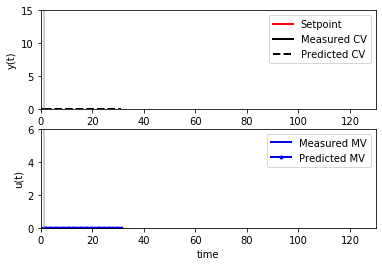

Initial SSE Objective: 0.0
Final SSE Objective: 0.0
Elapsed time: 0.1564030647277832


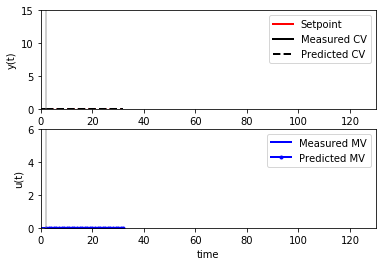

Initial SSE Objective: 0.0
Final SSE Objective: 0.0
Elapsed time: 0.1576540470123291


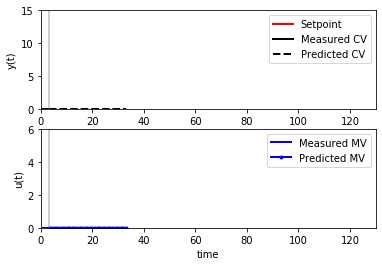

Initial SSE Objective: 0.0
Final SSE Objective: 0.0
Elapsed time: 0.1570267677307129


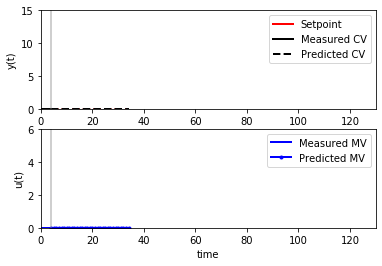

Initial SSE Objective: 0.0
Final SSE Objective: 0.0
Elapsed time: 0.15923643112182617


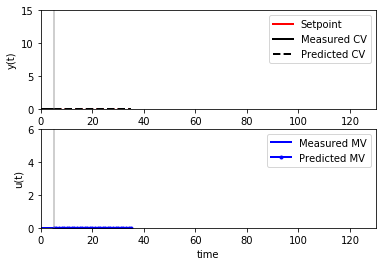

Initial SSE Objective: 0.0
Final SSE Objective: 0.0
Elapsed time: 0.15560173988342285


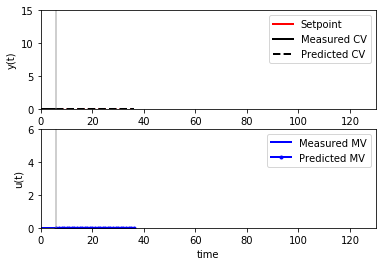

Initial SSE Objective: 0.0
Final SSE Objective: 0.0
Elapsed time: 0.1568901538848877


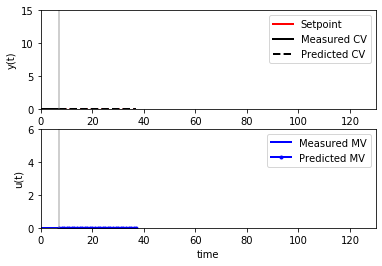

Initial SSE Objective: 0.0
Final SSE Objective: 0.0
Elapsed time: 0.17728924751281738


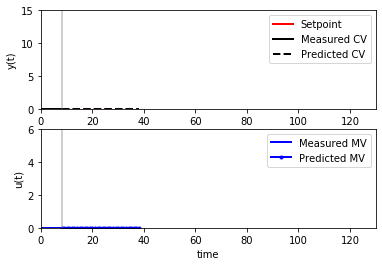

Initial SSE Objective: 0.0
Final SSE Objective: 0.0
Elapsed time: 0.1783280372619629


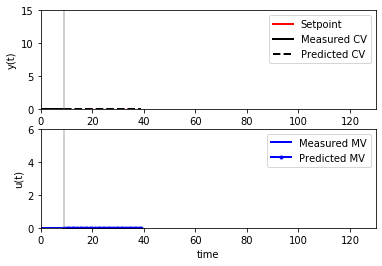

Initial SSE Objective: 750.0
Final SSE Objective: 105.66128568283136
Elapsed time: 3.8041000366210938


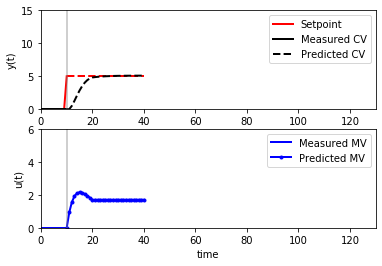

Initial SSE Objective: 213.5609443902939
Final SSE Objective: 62.66865193680429
Elapsed time: 3.3269872665405273


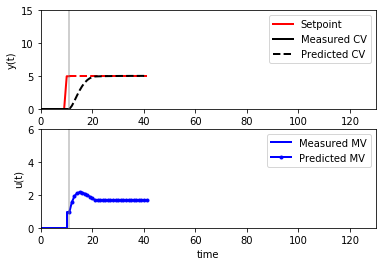

Initial SSE Objective: 51.16759443514071
Final SSE Objective: 34.899066910071
Elapsed time: 2.869466543197632


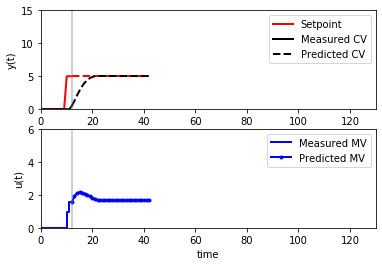

Initial SSE Objective: 27.348879690905978
Final SSE Objective: 18.26881993229113
Elapsed time: 3.094304323196411


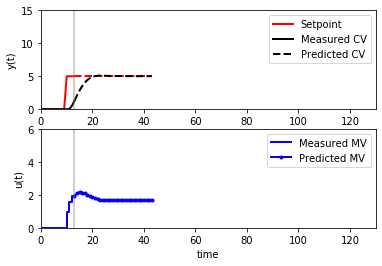

Initial SSE Objective: 36.77653523893931
Final SSE Objective: 9.0352492136136
Elapsed time: 3.3787639141082764


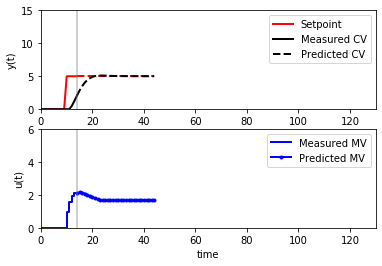

Initial SSE Objective: 43.076326662346
Final SSE Objective: 4.282955276588893
Elapsed time: 3.4825899600982666


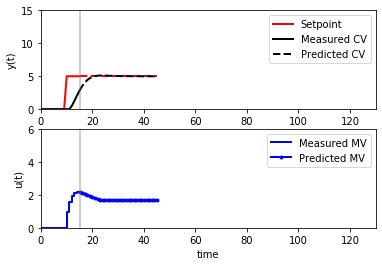

Initial SSE Objective: 40.098975641111
Final SSE Objective: 2.0113969424255926
Elapsed time: 3.504307985305786


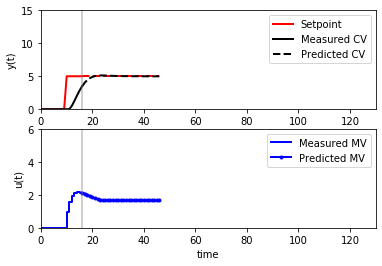

Initial SSE Objective: 31.430271725633393
Final SSE Objective: 0.9934028406067164
Elapsed time: 3.3283071517944336


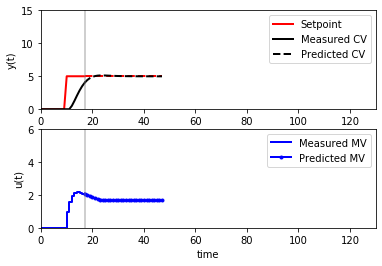

Initial SSE Objective: 21.552970955015486
Final SSE Objective: 0.5512867505131079
Elapsed time: 3.682403564453125


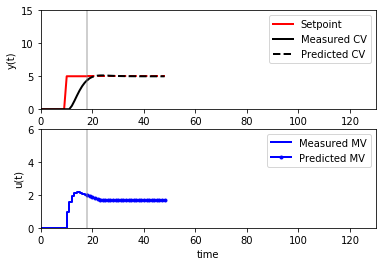

Initial SSE Objective: 13.184490830924275
Final SSE Objective: 0.34911700000400225
Elapsed time: 3.925736427307129


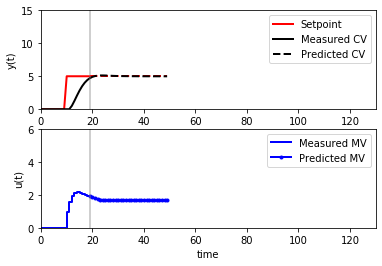

Initial SSE Objective: 7.243543981484946
Final SSE Objective: 0.23935965271611814
Elapsed time: 3.652874231338501


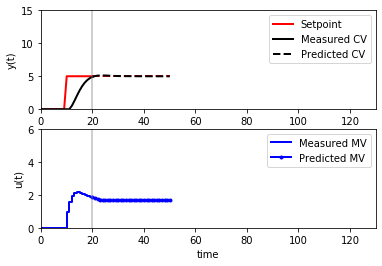

Initial SSE Objective: 3.560922844143037
Final SSE Objective: 0.16607547808344267
Elapsed time: 3.5085842609405518


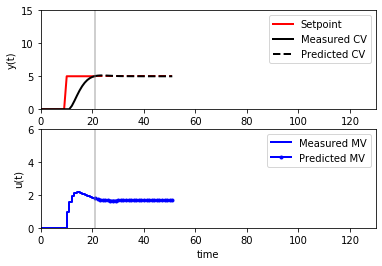

Initial SSE Objective: 1.5424721776000945
Final SSE Objective: 0.11161632164339984
Elapsed time: 3.3281478881835938


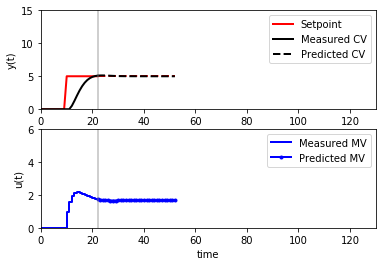

Initial SSE Objective: 0.5701252175776866
Final SSE Objective: 0.07118177089405105
Elapsed time: 3.3645918369293213


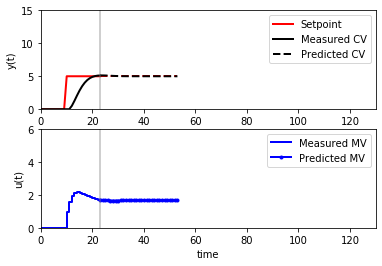

Initial SSE Objective: 0.17026276747209299
Final SSE Objective: 0.04272923437517126
Elapsed time: 2.8747622966766357


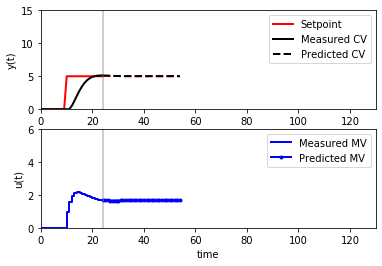

Initial SSE Objective: 0.041182314914352584
Final SSE Objective: 0.02413420396125421
Elapsed time: 3.0070958137512207


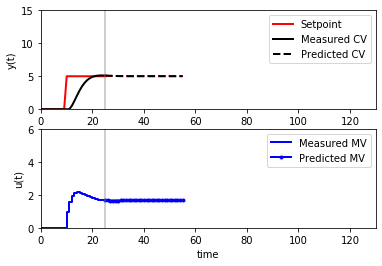

Initial SSE Objective: 0.016765635662144052
Final SSE Objective: 0.012796838512088791
Elapsed time: 2.6501624584198


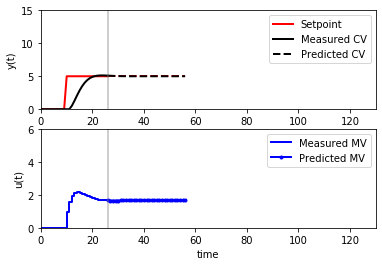

Initial SSE Objective: 0.02099770835266457
Final SSE Objective: 0.006408475054229667
Elapsed time: 3.0225002765655518


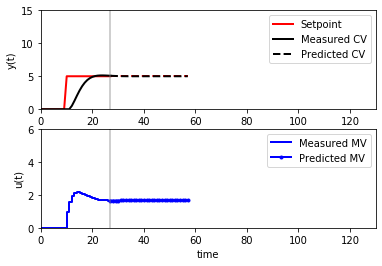

Initial SSE Objective: 0.0264374287304442
Final SSE Objective: 0.0030489724153871466
Elapsed time: 3.487905502319336


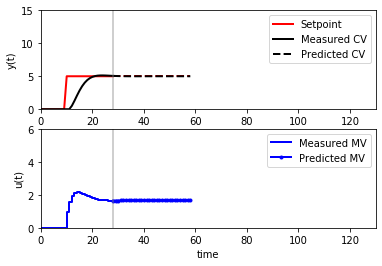

Initial SSE Objective: 0.02554927692397877
Final SSE Objective: 0.0014290630198853628
Elapsed time: 3.6097280979156494


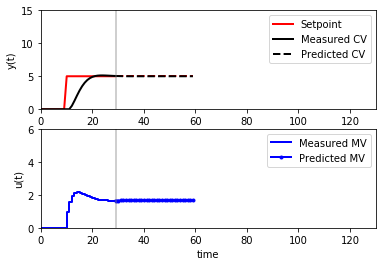

Initial SSE Objective: 0.020592023318401917
Final SSE Objective: 0.0006955737012009848
Elapsed time: 3.1413726806640625


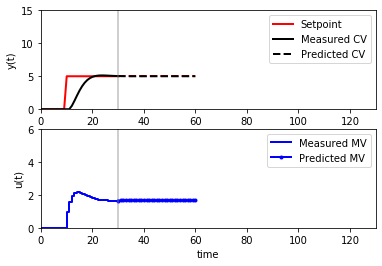

Initial SSE Objective: 0.014442383345953297
Final SSE Objective: 0.0003770979007654073
Elapsed time: 2.8552281856536865


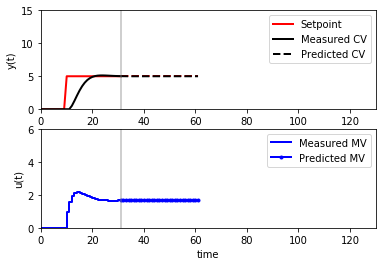

Initial SSE Objective: 0.009355623590174254
Final SSE Objective: 0.00024348178065308987
Elapsed time: 3.0584588050842285


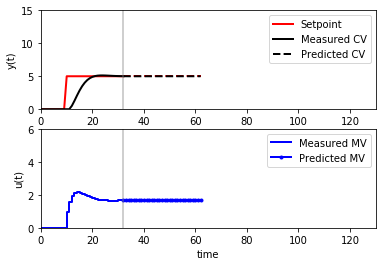

Initial SSE Objective: 0.00542031724911648
Final SSE Objective: 0.0001730133777792163
Elapsed time: 2.649543046951294


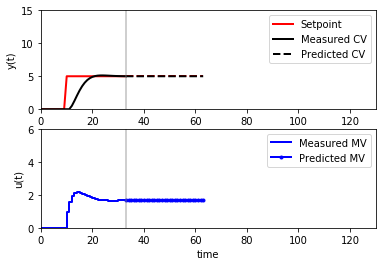

Initial SSE Objective: 0.0027656892653271765
Final SSE Objective: 0.00012274285250126252
Elapsed time: 2.64102840423584


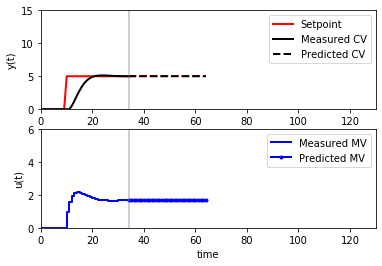

Initial SSE Objective: 0.0012444305550988709
Final SSE Objective: 8.432935818270554e-05
Elapsed time: 2.3902077674865723


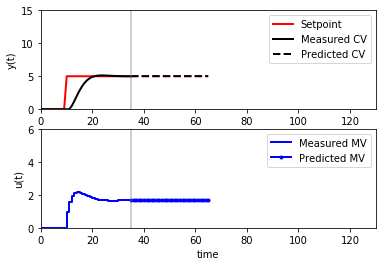

Initial SSE Objective: 0.00047175701086729226
Final SSE Objective: 5.414903775230787e-05
Elapsed time: 2.378710985183716


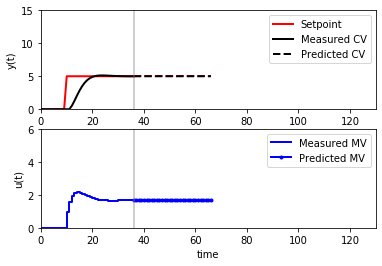

Initial SSE Objective: 0.00014477567483855508
Final SSE Objective: 3.2735018153241366e-05
Elapsed time: 1.995354175567627


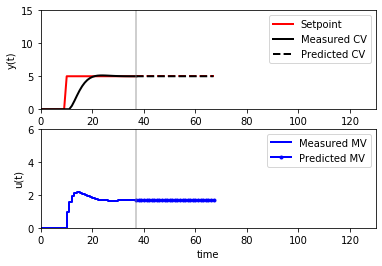

Initial SSE Objective: 3.4369975960756705e-05
Final SSE Objective: 1.8804868112329745e-05
Elapsed time: 1.3067855834960938


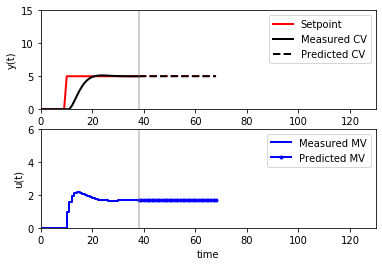

Initial SSE Objective: 1.2488103816465325e-05
Final SSE Objective: 1.0108786705474337e-05
Elapsed time: 0.6571063995361328


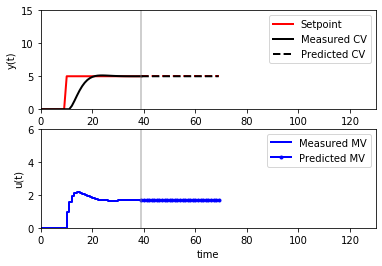

Initial SSE Objective: 749.9149541034674
Final SSE Objective: 105.69950353499847
Elapsed time: 4.5916407108306885


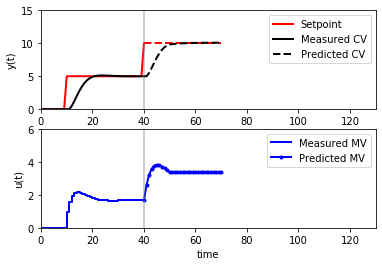

Initial SSE Objective: 213.54524873714132
Final SSE Objective: 62.71883849964318
Elapsed time: 4.2983973026275635


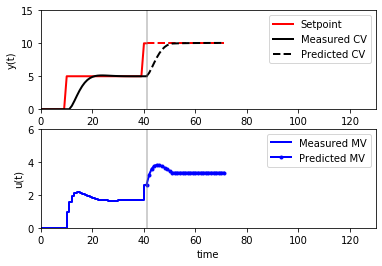

Initial SSE Objective: 51.18843271246542
Final SSE Objective: 34.93988224996364
Elapsed time: 4.072873115539551


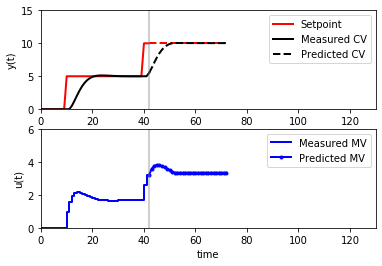

Initial SSE Objective: 27.41362592249047
Final SSE Objective: 18.29410103302784
Elapsed time: 4.044538974761963


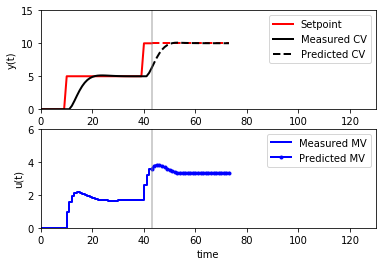

Initial SSE Objective: 36.873290636610946
Final SSE Objective: 9.049322509364716
Elapsed time: 4.177202224731445


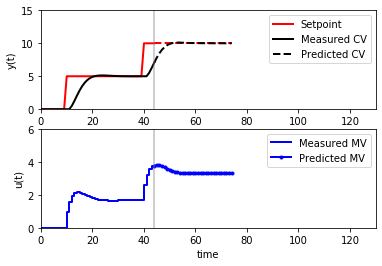

Initial SSE Objective: 43.178355289363715
Final SSE Objective: 4.28992874745683
Elapsed time: 4.141176223754883


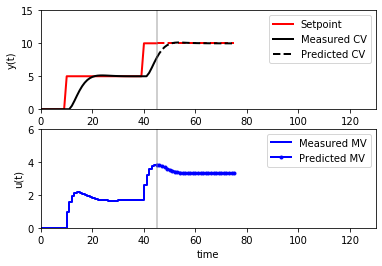

Initial SSE Objective: 40.18647203498276
Final SSE Objective: 2.01463676523944
Elapsed time: 4.071723699569702


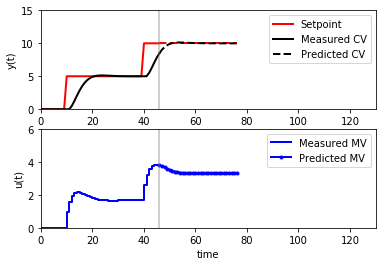

Initial SSE Objective: 31.494396852802726
Final SSE Objective: 0.9949876048773328
Elapsed time: 4.00485372543335


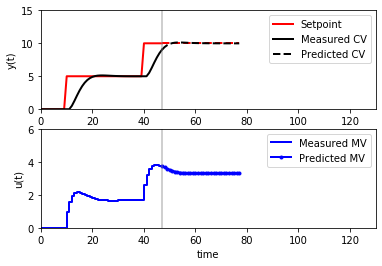

Initial SSE Objective: 21.59382266771506
Final SSE Objective: 0.5522461490760658
Elapsed time: 4.06703782081604


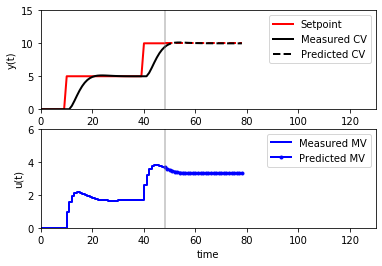

Initial SSE Objective: 13.207114436187062
Final SSE Objective: 0.3498497916080878
Elapsed time: 3.9416768550872803


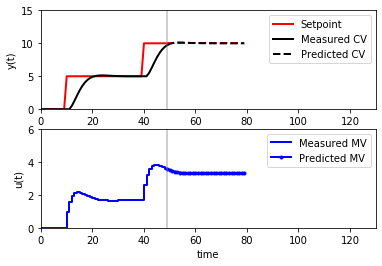

Initial SSE Objective: 7.25413197623741
Final SSE Objective: 0.2399661657150694
Elapsed time: 3.8494179248809814


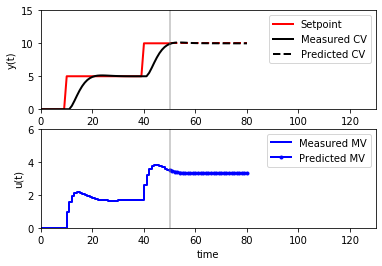

Initial SSE Objective: 3.564819553040734
Final SSE Objective: 0.1665612163749463
Elapsed time: 3.7382102012634277


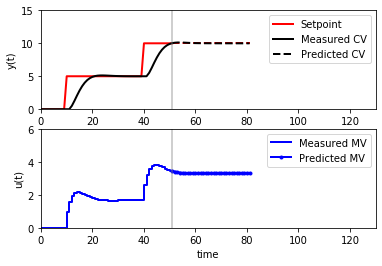

Initial SSE Objective: 1.5432901532980852
Final SSE Objective: 0.11197529604314564
Elapsed time: 3.663578987121582


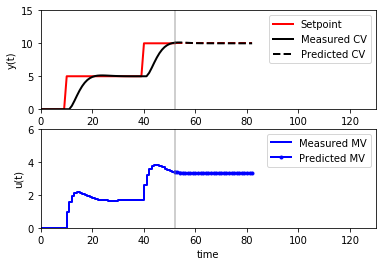

Initial SSE Objective: 0.5699266495141555
Final SSE Objective: 0.07142463469878285
Elapsed time: 3.919799566268921


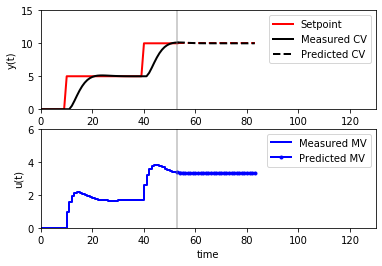

Initial SSE Objective: 0.16997543326747092
Final SSE Objective: 0.04287906317635631
Elapsed time: 3.035792112350464


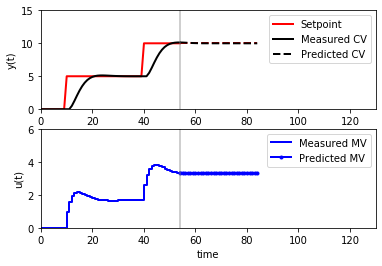

Initial SSE Objective: 0.04109906048338759
Final SSE Objective: 0.02421857864978049
Elapsed time: 2.8620452880859375


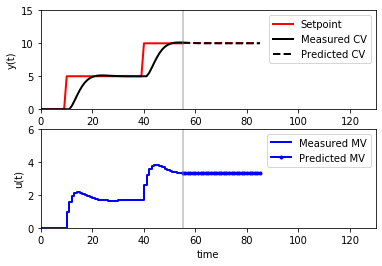

Initial SSE Objective: 0.01688254583706434
Final SSE Objective: 0.01284083560734397
Elapsed time: 2.9269497394561768


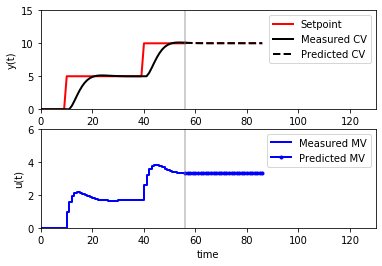

Initial SSE Objective: 0.021369221166943
Final SSE Objective: 0.0064189761221222115
Elapsed time: 2.8727481365203857


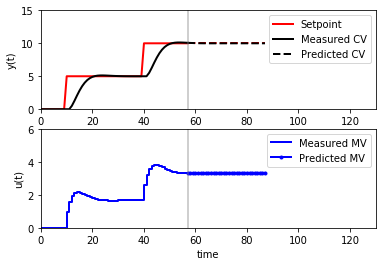

Initial SSE Objective: 0.02681474127687925
Final SSE Objective: 0.0030526639942524696
Elapsed time: 3.6045219898223877


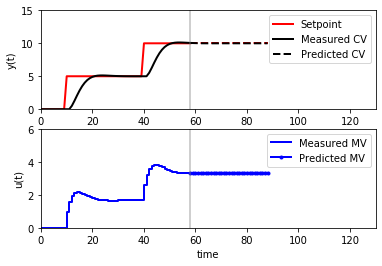

Initial SSE Objective: 0.025829075218410574
Final SSE Objective: 0.0014309177081377402
Elapsed time: 3.496081829071045


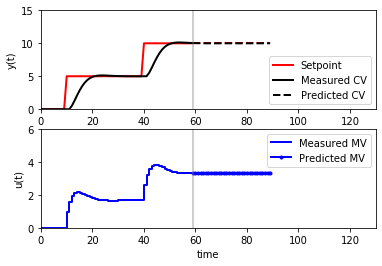

Initial SSE Objective: 0.020767159567770983
Final SSE Objective: 0.0006972126524908505
Elapsed time: 3.22540545463562


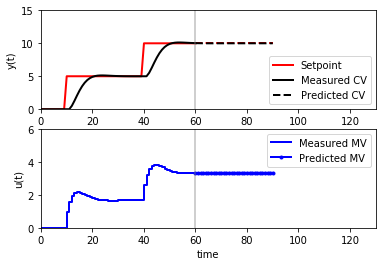

Initial SSE Objective: 0.014536667059449051
Final SSE Objective: 0.000378764817020245
Elapsed time: 2.9437386989593506


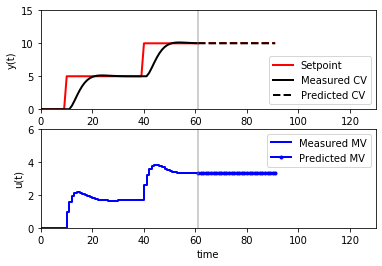

Initial SSE Objective: 0.009400135873279212
Final SSE Objective: 0.0002451023409909177
Elapsed time: 2.9598188400268555


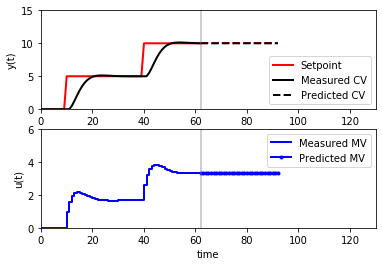

Initial SSE Objective: 0.00543660554123426
Final SSE Objective: 0.00017436020927200533
Elapsed time: 2.4693942070007324


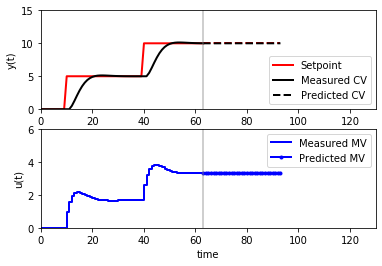

Initial SSE Objective: 0.0027685518335028437
Final SSE Objective: 0.00012371596068122618
Elapsed time: 2.593338966369629


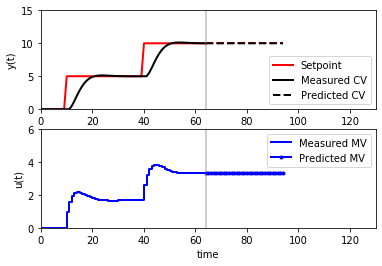

Initial SSE Objective: 0.0012426297960637235
Final SSE Objective: 8.495728765219547e-05
Elapsed time: 2.2151401042938232


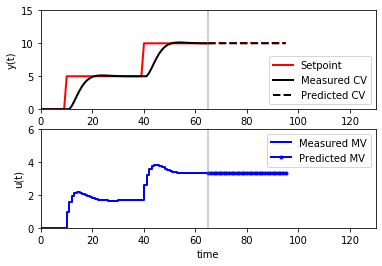

Initial SSE Objective: 0.0004694997701978888
Final SSE Objective: 5.451642903827793e-05
Elapsed time: 2.131608247756958


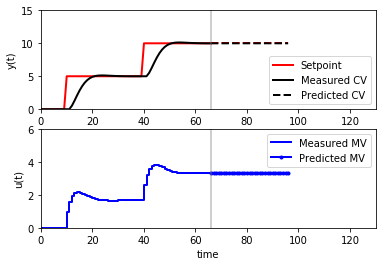

Initial SSE Objective: 0.00014337460566428133
Final SSE Objective: 3.292688834645096e-05
Elapsed time: 1.8502297401428223


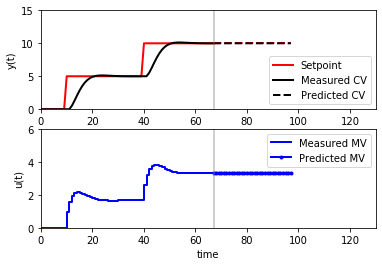

Initial SSE Objective: 3.3935747845712555e-05
Final SSE Objective: 1.8884271711591517e-05
Elapsed time: 1.3561298847198486


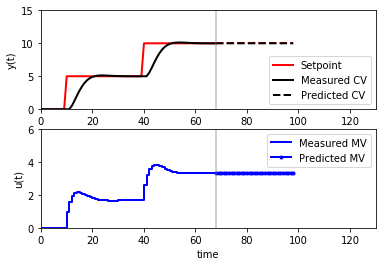

Initial SSE Objective: 1.2673545381066082e-05
Final SSE Objective: 1.0151746440665603e-05
Elapsed time: 0.6406176090240479


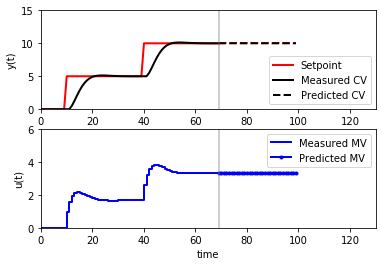

Initial SSE Objective: 1.3117804756131195e-05
Final SSE Objective: 5.575244721382028e-06
Elapsed time: 0.6224551200866699


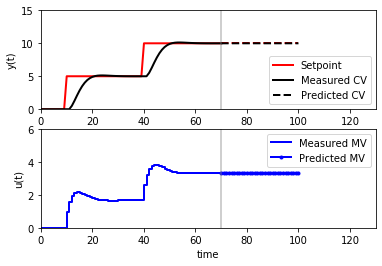

Initial SSE Objective: 2.2695669476509222e-05
Final SSE Objective: 1.2407387623944815e-05
Elapsed time: 0.9113481044769287


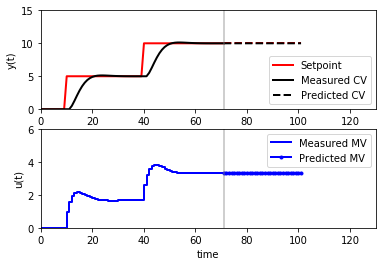

Initial SSE Objective: 3.450367551856816e-05
Final SSE Objective: 1.4058368956033124e-05
Elapsed time: 0.9163947105407715


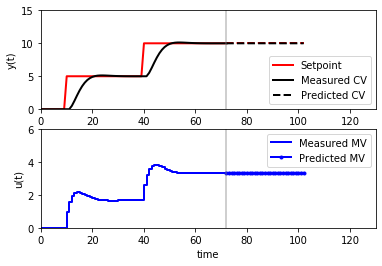

Initial SSE Objective: 4.468237254971212e-05
Final SSE Objective: 1.1028387255737045e-05
Elapsed time: 1.1769015789031982


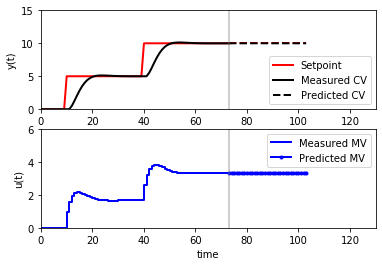

Initial SSE Objective: 5.2684868472228315e-05
Final SSE Objective: 6.8259893405872075e-06
Elapsed time: 1.3878087997436523


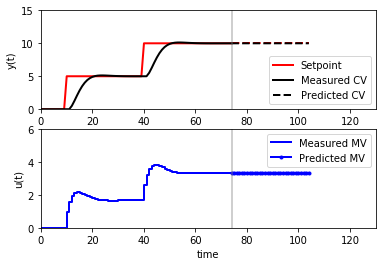

Initial SSE Objective: 5.2607721440406004e-05
Final SSE Objective: 3.6507653620634264e-06
Elapsed time: 1.4373931884765625


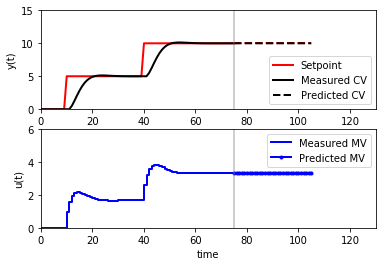

Initial SSE Objective: 4.449745960613579e-05
Final SSE Objective: 1.7897018764206315e-06
Elapsed time: 1.40531325340271


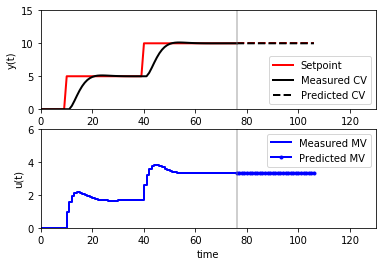

Initial SSE Objective: 3.219401607133235e-05
Final SSE Objective: 1.3040029045195286e-06
Elapsed time: 1.1473300457000732


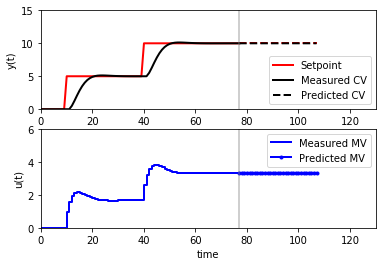

Initial SSE Objective: 2.0195827339188995e-05
Final SSE Objective: 9.280237863423474e-07
Elapsed time: 1.0996308326721191


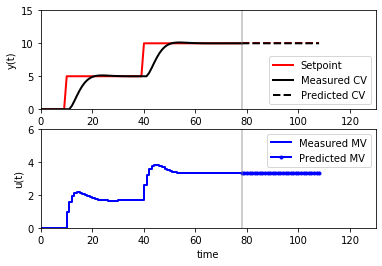

Initial SSE Objective: 1.0680565704179741e-05
Final SSE Objective: 1.1355387811135263e-06
Elapsed time: 0.7983109951019287


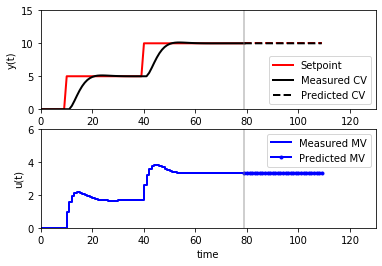

Initial SSE Objective: 1470.1742280113122
Final SSE Objective: 207.11828833358825
Elapsed time: 4.359799385070801


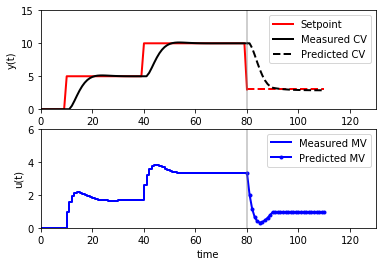

Initial SSE Objective: 606.5458672571745
Final SSE Objective: 140.4343759000938
Elapsed time: 3.957700252532959


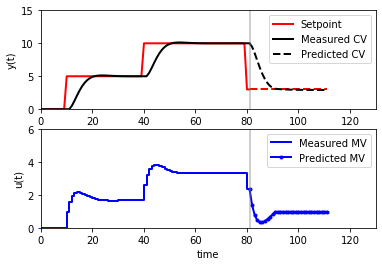

Initial SSE Objective: 147.45823001389243
Final SSE Objective: 79.67855889955813
Elapsed time: 3.758153200149536


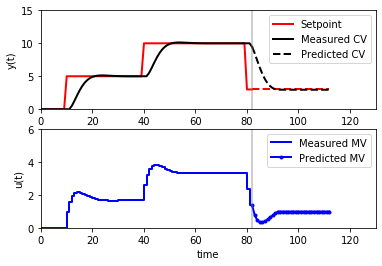

Initial SSE Objective: 53.34998372582889
Final SSE Objective: 42.465746888116904
Elapsed time: 3.8355019092559814


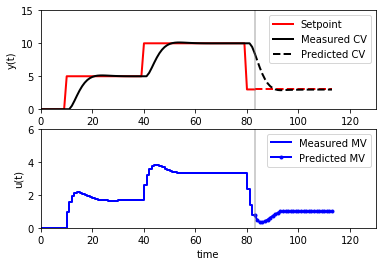

Initial SSE Objective: 63.9570433144547
Final SSE Objective: 21.337789492974057
Elapsed time: 3.872420310974121


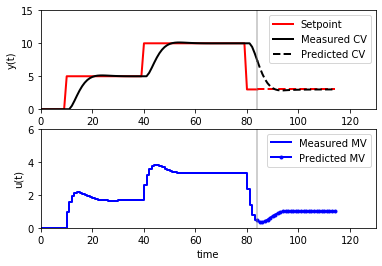

Initial SSE Objective: 80.54838472965137
Final SSE Objective: 10.218112280799199
Elapsed time: 4.014472484588623


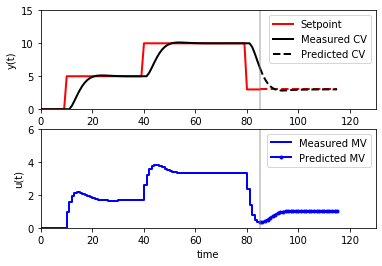

Initial SSE Objective: 79.74707307853086
Final SSE Objective: 4.787972597720021
Elapsed time: 3.9910528659820557


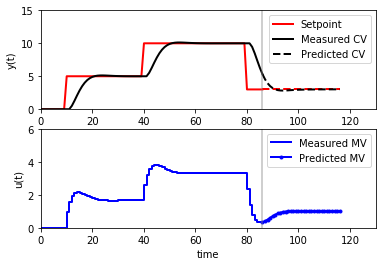

In [ ]:
#  Create plot
plt.figure(figsize=(15,8))
plt.ion()
plt.show()

for i in range(1,ns+1):
    if i==1:
        y0 = 0
    ts = [delta_t*(i-1),delta_t*i]
    y = odeint(process_model,y0,ts,args=(u[i],K,tau))
    y0 = y[-1]
    yp[i] = y[0]

    # Declare the variables in fuctions
    t_hat = np.linspace(i-P,i+P,2*P+1)
    delta_t_hat = t_hat[1]-t_hat[0]
    se = np.zeros(2*P+1)
    yp_hat = np.zeros(2*P+1)
    u_hat0 = np.zeros(2*P+1)
    sp_hat = np.zeros(2*P+1)
    obj = 0.0
    
    # initial guesses
    for k in range(1,2*P+1):

        if k<=P:
            if i-P+k<0:
                u_hat0[k] = 0

            else:
                u_hat0[k] = u[i-P+k]

        elif k>P:
            u_hat0[k] = u[i]

    # show initial objective
    print('Initial SSE Objective: ' + str(objective(u_hat0)))

    # MPC calculation
    start = time.time()

    solution = minimize(objective,u_hat0,method='SLSQP')
    u_hat = solution.x  

    end = time.time()
    elapsed = end - start

    print('Final SSE Objective: ' + str(objective(u_hat)))
    print('Elapsed time: ' + str(elapsed) )

    delta = np.diff(u_hat)

    if i<ns:    
        if np.abs(delta[P]) >= maxmove:
            if delta[P] > 0:
                u[i+1] = u[i]+maxmove
            else:
                u[i+1] = u[i]-maxmove

        else:
            u[i+1] = u[i]+delta[P]

    # plotting for forced prediction
    plt.clf()
    plt.subplot(2,1,1)
    plt.plot(t[0:i+1],sp[0:i+1],'r-',linewidth=2,label='Setpoint')
    plt.plot(t_hat[P:],sp_hat[P:],'r--',linewidth=2)
    plt.plot(t[0:i+1],yp[0:i+1],'k-',linewidth=2,label='Measured CV')
    plt.plot(t_hat[P:],yp_hat[P:],'k--',linewidth=2,label='Predicted CV')
    plt.axvline(x=i,color='gray',alpha=0.5)
    plt.axis([0, ns+P, 0, 15])
    plt.ylabel('y(t)')
    plt.legend()
    plt.subplot(2,1,2)
    plt.step(t[0:i+1],u[0:i+1],'b-',linewidth=2,label='Measured MV')
    plt.plot(t_hat[P:],u_hat[P:],'b.-',linewidth=2,label='Predicted MV')
    plt.axvline(x=i,color='gray',alpha=0.5)
    plt.ylabel('u(t)')
    plt.xlabel('time')
    plt.axis([0, ns+P, 0, 6])
    plt.legend()
    fig = plt.gcf()
    plt.draw()
    plt.pause(0.1)
    if make_mp4:
        filename='./figures/plot_'+str(i+10000)+'.png'
        fig.savefig(filename)

In [ ]:
# generate mp4 from png figures in batches of 350
if make_mp4:
    images = []
    iset = 0
    for i in range(1,ns):
        filename='./figures/plot_'+str(i+10000)+'.png'
        images.append(imageio.imread(filename))
        if ((i+1)%350)==0:
            imageio.mimsave('results_'+str(iset)+'.mp4', images)
            iset += 1
            images = []
    if images!=[]:
        imageio.mimsave('results_'+str(iset)+'.mp4', images)